### **Week 3**

**DATASET** <br>
*   Download the **MBA dataset** from Elearn
*   Upload the dataset to your own Github
*   Import the dataset using URL from your Github


<br>

**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [46]:
#Import Library
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


1. display 5 columns from dataset

In [14]:
#1
url = 'https://raw.githubusercontent.com/sulthanahmed31/data-mining/refs/heads/main/MBA.csv'
dataset = pd.read_csv(url,sep=',')
dataset.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [16]:
#2
dataset.info()
#conclusion
print("Dataset ini berisi informasi tentang 6194 aplikasi dengan data yang sebagian besar lengkap terkait major,gender, kinerja akademis (GPA, GMAT), dan work_exp. Namun, kolom race dan admission memiliki missing value secara substansial, yang dapat memengaruhi analisis atau pembangunan model yang melibatkan variabel-variabel ini.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB
Dataset ini berisi informasi tentang 6194 aplikasi dengan data yang sebagian besar lengkap terkait major,gender, kinerja akademis (GPA, GMAT), dan work_exp. Namun, kolom race dan admission memiliki missing value secara substansial, yang dapat memengaruhi analisis atau pembangunan

3. display the number of each unique value in the race and admission columns (including NaN)

In [20]:
#3a
admission_counts = dataset['admission'].value_counts(dropna=False)
admission_counts

,count
admission,
NaN,5194
Admit,900
Waitlist,100


In [21]:
#3b
race_counts = dataset['race'].value_counts(dropna=False)
race_counts

,count
race,
NaN,1842
White,1456
Asian,1147
Black,916
Hispanic,596
Other,237


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [23]:
#4
dataset['admission'].fillna('deny', inplace=True)
dataset['race'].fillna('other', inplace=True)
dataset

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,deny
2,3,Female,True,3.30,Business,other,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,deny
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,deny
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,deny
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,deny
6191,6192,Female,True,3.22,Business,other,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,other,590.0,5.0,Other,deny


5. recheck missing value

In [24]:
#5
missing_values = dataset.isnull().sum()
missing_values

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [25]:
# 6
dataset.drop('application_id', axis=1, inplace=True)

7. show describe column and conclude what the insight is from that column

In [27]:
#7
describe_stats = dataset.describe()
describe_stats
#conclusion
#This suggests that the applicants are generally well-qualified for competitive programs, with little extreme variation in either academic or professional experience.
#

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

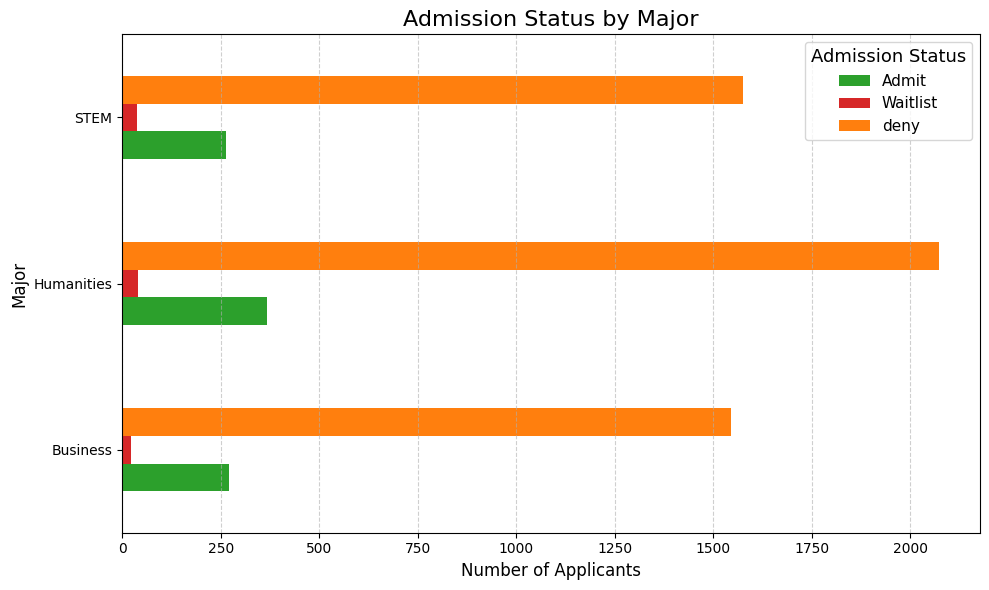

In [30]:
#8

# Group data by 'major' and 'admission' status, and count occurrences
admission_by_major = dataset.groupby(['major', 'admission']).size().unstack(fill_value=0)

# Create a horizontal bar chart (stacked bar)
admission_by_major.plot(kind='barh', stacked=False, figsize=(10, 6), color=['#2ca02c', '#d62728', '#ff7f0e'])

# Customize the chart
plt.title('Admission Status by Major', fontsize=16)
plt.xlabel('Number of Applicants', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Admission Status', title_fontsize='13', fontsize='11')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the chart
plt.tight_layout()
plt.show()
#conclusion is many admission is denied in all major

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

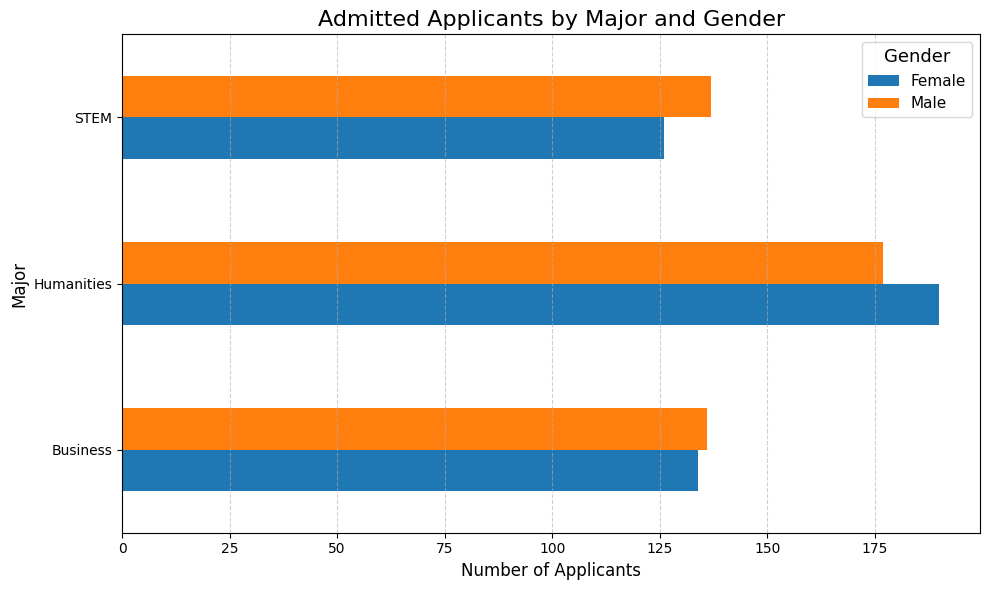

In [36]:
#9
# Filter the DataFrame to include only admitted applicants
admitted_df = dataset[dataset['admission'] == 'Admit']

# Group data by major and gender, then count the occurrences
admission_by_major_gender = admitted_df.groupby(['major', 'gender']).size().unstack(fill_value=0)

# Ensure the data is numeric (already should be, but just in case)
admission_by_major_gender = admission_by_major_gender.astype(int)

# Create a horizontal bar chart (stacked bar)
admission_by_major_gender.plot(kind='barh', stacked=False, figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])

# Customize the chart
plt.title('Admitted Applicants by Major and Gender', fontsize=16)
plt.xlabel('Number of Applicants', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Gender', title_fontsize='13', fontsize='11')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Show the chart
plt.tight_layout()
plt.show()

10. create your own insightful visualization and explain it in at least 2 sentences

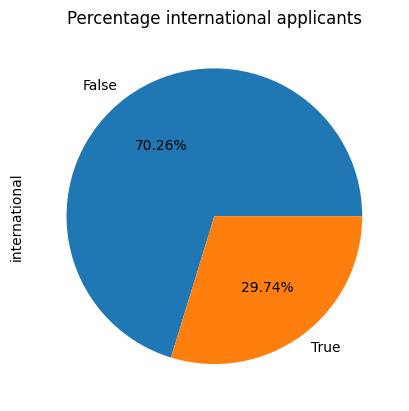

In [37]:
#10
data = dataset.groupby("international")["international"].count()
data.plot(kind='pie', autopct='%1.2f%%',
title='Percentage international applicants')
plt.show()
#70,26 percent of applicant is not international. 29,74 percent is international.

11. create your own insightful visualization and explain it in at least 2 sentences

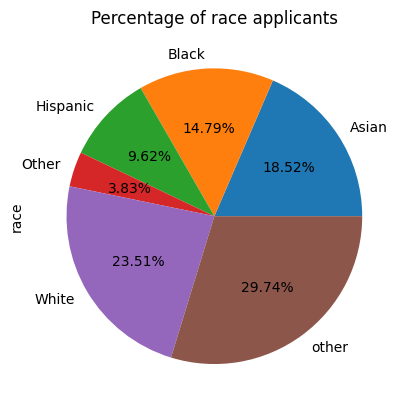

In [38]:
#11
data = dataset.groupby("race")["race"].count()
data.plot(kind='pie', autopct='%1.2f%%',
title='Percentage of race applicants')
plt.show()
#29,74 percent of applicant is other. 23,51 percent is white.

12. encode categorical columns and display the results

In [47]:
#12
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# List of categorical columns to encode (excluding 'admission')
categorical_columns = ['gender', 'major', 'international', 'work_industry','race']

# Encode each categorical column
for column in categorical_columns:
    dataset[column] = label_encoder.fit_transform(dataset[column])

# Display the updated dataset
dataset.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,3.0,3,Admit
1,1,0,3.28,1,1,680.0,5.0,6,deny
2,0,1,3.30,0,5,710.0,5.0,13,Admit
3,1,0,3.47,2,1,690.0,6.0,13,deny
4,1,0,3.35,2,2,590.0,5.0,1,deny


In [54]:
# Encode the admission column
# Pilih kolom yang diinginkan
selected_columns = data[['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp', 'work_industry', 'admission']]

# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# Daftar kolom kategorikal untuk di-encode
categorical_columns = ['gender', 'major', 'international', 'work_industry', 'race', 'admission']

# Encode setiap kolom kategorikal
for column in categorical_columns:
    selected_columns[column] = label_encoder.fit_transform(selected_columns[column])

# Tampilkan dataset yang diperbarui
selected_columns.head()

KeyError: "None of [Index(['gender', 'international', 'gpa', 'major', 'race', 'gmat', 'work_exp',\n       'work_industry', 'admission'],\n      dtype='object', name='race')] are in the [index]"

13. create a heatmap to see the correlation and explain the conclusion

In [53]:
#13
# Pilih kolom yang diinginkan dan encode kolom kategorikal
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'major', 'international', 'work_industry', 'race', 'admission']

for column in categorical_columns:
    categorical_columns[column] = label_encoder.fit_transform(categorical_columns[column])

# Hitung matriks korelasi
correlation_matrix = categorical_columns.corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=0.5)
plt.title('Korelasi Antara Variabel')
plt.show()

TypeError: list indices must be integers or slices, not str

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [ ]:
# prompt: make a model classification

# Separate features and target variable

# Split the data into training and testing sets

# Create a Decision Tree Classifier

# Train the model

# Make predictions on the test set

# Evaluate the model


Accuracy: 0.7828894269572235


In [ ]:
# Get the average GPA

# Create Lisa's data as a dictionary

# Create a DataFrame with Lisa's data

# Encode categorical features for Lisa's data

# Make a prediction using the trained model

# Decode the prediction back to the original label


Prediction for Lisa's admission: Finance
